Converged after 11 iterations
Theta0: -5.989351375967901e-14, Theta1: 0.6547445706774571
Final Cost: 0.28544550327780643


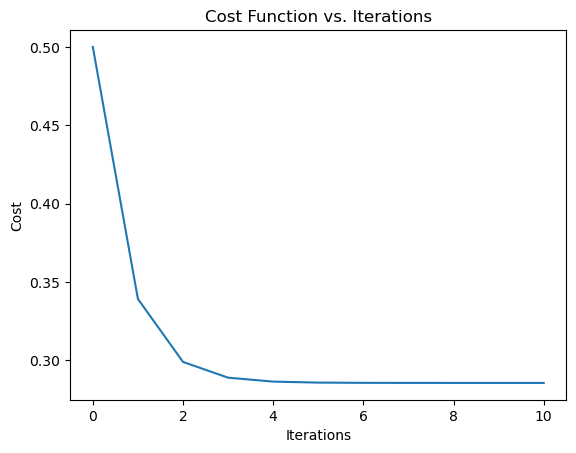

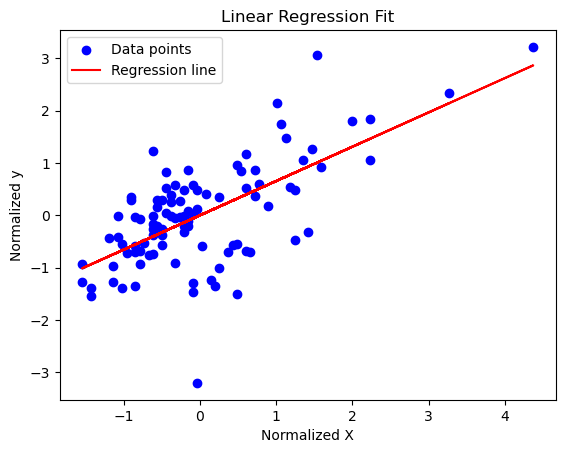

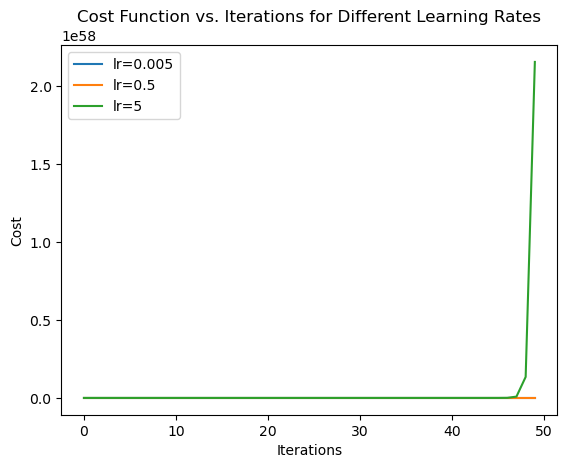

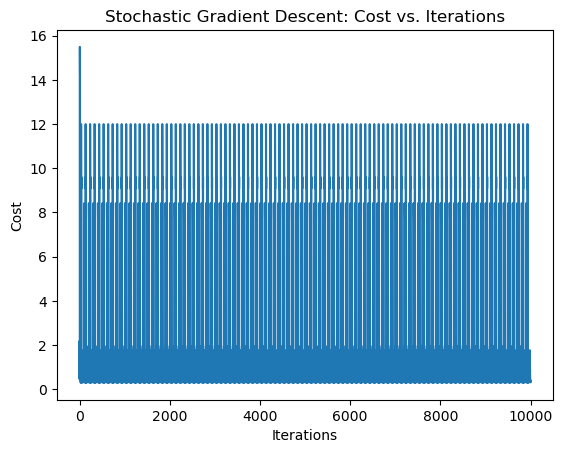

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([9.1,8,9.1,8.4,6.9,7.7,15.6,7.3,7,7.2,10.1,11.5,7.1,10,8.9,7.9,5.6,6.3,6.7,10.4,8.5,7.4,6.3,5.4,8.9,9.4,7.5,11.9,7.8,7.4,
10.8,
10.2,
6.2,
7.7,
13.7,
8,
6.7,
6.7,
7,
8.3,
7.4,
9.9,
6.1,
7,
5.4,
10.7,
7.6,
8.9,
9.2,
6.6,
7.2,
8,
7.8,
7.9,
7,
7,
7.6,
9.1,
9,
7.9,
6.6,
11.9,
6.5,
7.1,
8.8,
7.5,
7.7,
6,
10.6,
6.6,
8.2,
7.9,
7.1,
5.6,
6.4,
7.5,
9.8,
7,
10.5,
7.1,
6.2,
6.5,
7.7,
7.2,
9.3,
8.5,
7.7,
6.8,
7.8,
8.7,
9.6,
7.2,
9.3,
8.1,
6.6,
7.8,
10.2,
6.1,
7.3,
7.3
])
y = np.array([0.99523,
0.99007,
0.99769,
0.99386,
0.99508,
0.9963,
1.0032,
0.99768,
0.99584,
0.99609,
0.99774,
1.0003,
0.99694,
0.99965,
0.99549,
0.99364,
0.99378,
0.99379,
0.99524,
0.9988,
0.99733,
0.9966,
0.9955,
0.99471,
0.99354,
0.99786,
0.9965,
0.9988,
0.9964,
0.99713,
0.9985,
0.99565,
0.99578,
0.9976,
1.0014,
0.99685,
0.99648,
0.99472,
0.99914,
0.99408,
0.9974,
1.0002,
0.99402,
0.9966,
0.99402,
1.0029,
0.99718,
0.9986,
0.9952,
0.9952,
0.9972,
0.9976,
0.9968,
0.9978,
0.9951,
0.99629,
0.99656,
0.999,
0.99836,
0.99396,
0.99387,
1.0004,
0.9972,
0.9972,
0.99546,
0.9978,
0.99596,
0.99572,
0.9992,
0.99544,
0.99747,
0.99668,
0.9962,
0.99346,
0.99514,
0.99476,
1.001,
0.9961,
0.99598,
0.99608,
0.9966,
0.99732,
0.9962,
0.99546,
0.99738,
0.99456,
0.9966,
0.99553,
0.9984,
0.9952,
0.997,
0.99586,
0.9984,
0.99542,
0.99655,
0.9962,
0.9976,
0.99464,
0.9983,
0.9967
])


X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)


theta0, theta1 = 0, 0
learning_rate = 0.5
num_iterations = 100
m = len(X)


cost_history = []
for iteration in range(num_iterations):
    
    y_pred = theta0 + theta1 * X
    
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    cost_history.append(cost)
    
    d_theta0 = (1 / m) * np.sum(y_pred - y)
    d_theta1 = (1 / m) * np.sum((y_pred - y) * X)
    
    theta0 -= learning_rate * d_theta0
    theta1 -= learning_rate * d_theta1

    
    if iteration > 1 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
        break

print(f"Converged after {iteration + 1} iterations")
print(f"Theta0: {theta0}, Theta1: {theta1}")
print(f"Final Cost: {cost}")


plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, theta0 + theta1 * X, color='red', label='Regression line')
plt.title("Linear Regression Fit")
plt.xlabel("Normalized X")
plt.ylabel("Normalized y")
plt.legend()
plt.show()
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta0, theta1 = 0, 0
    cost_history = []
    for iteration in range(50):
        y_pred = theta0 + theta1 * X
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)
        d_theta0 = (1 / m) * np.sum(y_pred - y)
        d_theta1 = (1 / m) * np.sum((y_pred - y) * X)
        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1
    plt.plot(range(50), cost_history, label=f'lr={lr}')

plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

theta0, theta1 = 0, 0
cost_history = []
for iteration in range(num_iterations):
    for i in range(m):
        xi = X[i]
        yi = y[i]
        y_pred = theta0 + theta1 * xi
        d_theta0 = y_pred - yi
        d_theta1 = (y_pred - yi) * xi
        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1
        cost = (1 / (2 * m)) * np.sum((theta0 + theta1 * X - y) ** 2)
        cost_history.append(cost)

plt.plot(range(len(cost_history)), cost_history)
plt.title("Stochastic Gradient Descent: Cost vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()